In [9]:
import scipy
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gettingsegments import extract_segments, plot_signal
import seaborn as sns

In [5]:
current_dir = os.getcwd()
os.chdir('c:\\Users\\Melanie\\OneDrive - Rensselaer Polytechnic Institute\\Desktop\\School\\24_Spring\\MLE\\Project\\data')

electrode_locations = {"FP1": 0, "FP2": 1, "FC5": 2, "FC6": 3, "FZ": 4,
                        "T7": 5, "CZ": 6, "T8": 7, "P7": 8, "P3": 9, "PZ": 10,
                          "P4": 11, "P8": 12, "O1": 13, "Oz": 14, "O2": 15}

files = os.listdir()

#getting the demographics both gets rid   
demographics = pd.read_csv(files.pop(0),names=["Isman","Age","Fatigue"])
n = np.shape(demographics)[0]

In [6]:
def PCA_decomposition(files,explained_variance):
    pca = PCA(whiten = True, n_components = explained_variance) #whiten means making mean = 0, sd = 1

    pca_dimensions = np.zeros(n)
    for i,f in enumerate(files):
        t, signal, section_num, class_bool, p_num = extract_segments(f)

        new_signal = pca.fit_transform(signal.T).T

        pca_dimensions[i] = np.shape(new_signal)[0]
    return pca_dimensions

In [7]:
demographics["99% Variance Dimensions"] = PCA_decomposition(files, 0.99)
demographics["95% Variance Dimensions"] = PCA_decomposition(files, 0.95)

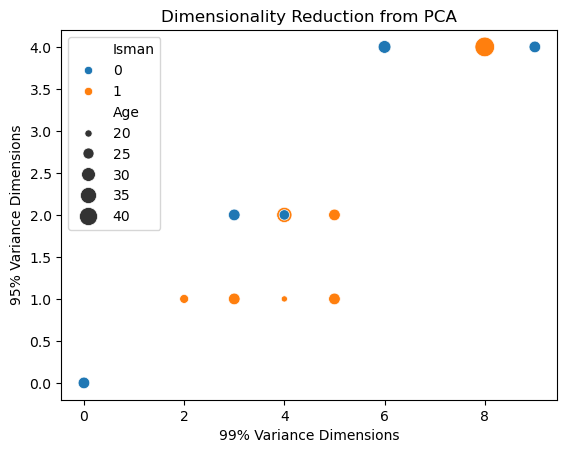

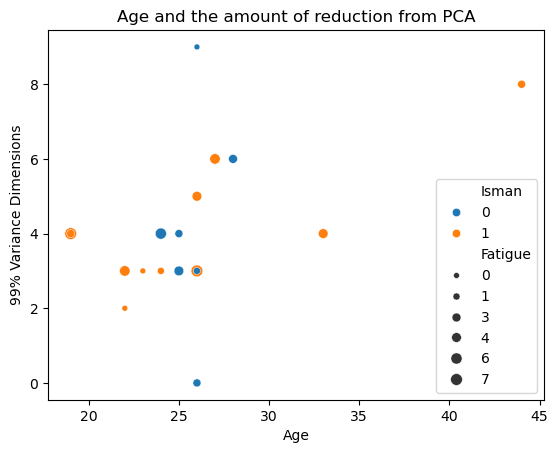

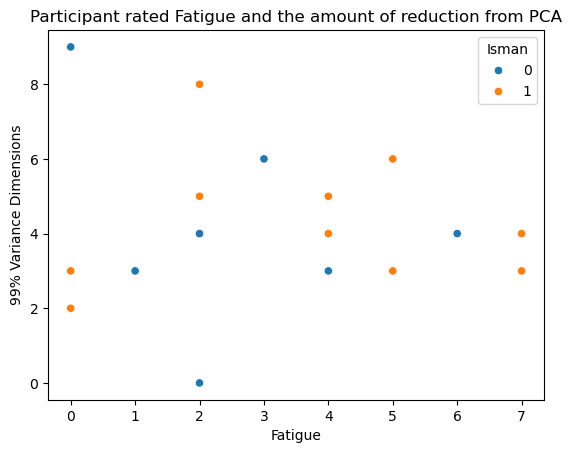

In [10]:
sns.scatterplot(x="99% Variance Dimensions",
                y="95% Variance Dimensions", 
                data = demographics, 
                hue='Isman', 
                size = "Age", sizes = (20,200))
plt.title("Dimensionality Reduction from PCA")
plt.show()

sns.scatterplot(x="Age", y="99% Variance Dimensions", data = demographics, hue='Isman', size = "Fatigue")
plt.title("Age and the amount of reduction from PCA")
plt.show()

sns.scatterplot(x="Fatigue", y="99% Variance Dimensions", data = demographics, hue='Isman')
plt.title("Participant rated Fatigue and the amount of reduction from PCA")
plt.show()